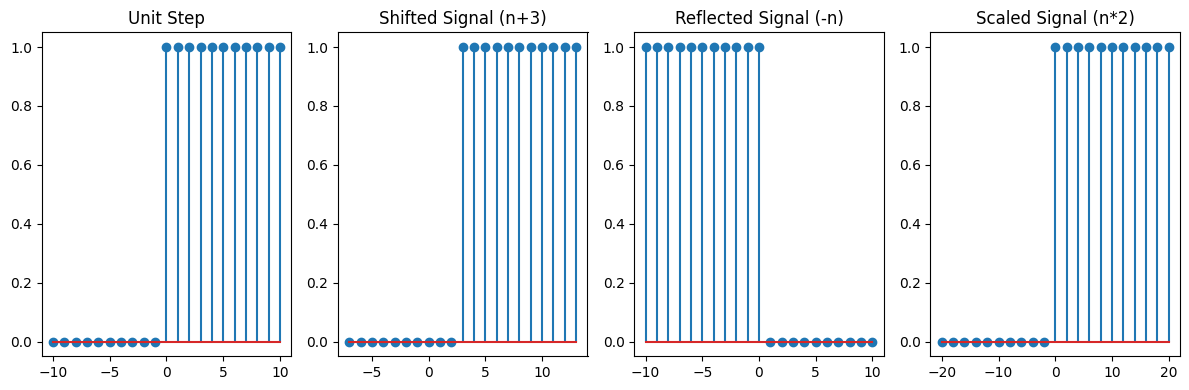

Sistem bersifat linear


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membuat sinyal unit step
def unit_step(n):
    return np.where(n >= 0, 1, 0)

# Operasi pada sinyal
def shift_signal(x, n, shift):
    return x, n + shift

def scale_signal(x, n, scale):
    return x, n * scale

def reflect_signal(x, n):
    return x[::-1], -n[::-1]

# Cek linearitas sistem
def check_linearity(system, x1, x2, n):
    a, b = 2, 3  # Koefisien skalar
    y1 = system(x1, n)
    y2 = system(x2, n)
    lhs = system(a*x1 + b*x2, n)
    rhs = a*y1 + b*y2
    return np.allclose(lhs, rhs)

# Contoh sistem: Sistem moving average sederhana
def moving_average_system(x, n):
    y = np.convolve(x, np.ones(3)/3, mode='same')
    return y

# Contoh penggunaan
n = np.arange(-10, 11)
x = unit_step(n)
x_shifted, n_shifted = shift_signal(x, n, 3)
x_reflected, n_reflected = reflect_signal(x, n)
x_scaled, n_scaled = scale_signal(x, n, 2)

# Plot hasil
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.stem(n, x)
plt.title("Unit Step")

plt.subplot(1, 4, 2)
plt.stem(n_shifted, x_shifted)
plt.title("Shifted Signal (n+3)")

plt.subplot(1, 4, 3)
plt.stem(n_reflected, x_reflected)
plt.title("Reflected Signal (-n)")

plt.subplot(1, 4, 4)
plt.stem(n_scaled, x_scaled)
plt.title("Scaled Signal (n*2)")

plt.tight_layout()
plt.show()

# Cek linearitas
x1 = unit_step(n)
x2 = np.sin(0.2 * np.pi * n)
is_linear = check_linearity(moving_average_system, x1, x2, n)

if is_linear:
    print("Sistem bersifat linear")
else:
    print("Sistem tidak linear")